Perform Sentiment Analysis in the network graph using RNN.

In [1]:
import pandas as pd
import networkx as nx

edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')
labels = pd.read_csv('labels.csv')

edges.head(), nodes.head(), labels.head()

(   user_id1  user_id2
 0       903        36
 1       210       744
 2       475       741
 3       418       353
 4       347       676,
    user_id              text
 0        1    Superb quality
 1        2        Worst ever
 2        3  This is terrible
 3        4      I hate this!
 4        5          Loved it,
    user_id  label
 0        1      1
 1        2      0
 2        3      0
 3        4      0
 4        5      1)

In [2]:
data = pd.merge(nodes, labels, on='user_id')

data.head()

,user_id,text,label
0,1,Superb quality,1
1,2,Worst ever,0
2,3,This is terrible,0
3,4,I hate this!,0
4,5,Loved it,1


In [3]:
graph = nx.Graph()
graph.add_nodes_from(data['user_id'])
graph.add_edges_from(edges.values)


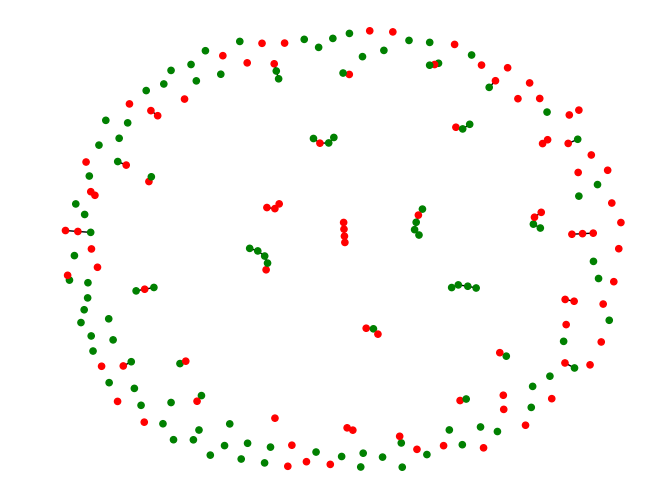

In [4]:
import matplotlib.pyplot as plt

nx.draw(graph.subgraph(data['user_id'][:200]),
        node_color=data['label'][:200].map({1:'green', 0:'red'}),
        node_size=20)

In [5]:
# sentence -> tokenize -> sequnece -> padding -> embedding -> training

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')

tokenizer.fit_on_texts(data['text']) # tokenize

tokenize_text = tokenizer.texts_to_sequences(data['text']) # sequencing

padded_text = pad_sequences(tokenize_text, maxlen=15) # padding

padded_text[:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6, 29,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  4]],
      dtype=int32)

In [7]:
X = padded_text
y = data['label']

In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

model = Sequential(
    [
        Embedding(2000, output_dim = 32),
        SimpleRNN(32),
        Dense(1,activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])


model.fit(X_train,y_train,epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.6591
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.4541
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1625
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0481
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0221


In [10]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0147 


[0.015487470664083958, 1.0]

In [11]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [12]:
y_pred[:5]

array([[0.99567777],
       [0.9951855 ],
       [0.00649944],
       [0.00495007],
       [0.99567777]], dtype=float32)